# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module `ThermostattedDynamics`

In [2]:
using ThermostattedDynamics

Let's import the parameters file

In [3]:
include("parameters.jl")

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And codify them in the predefined type Parameters

In [4]:
parameters = Parameters(T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ThermostattedDynamics.Parameters(1.0,0.1,0.0125,0.0025,10,50000,ThermostattedDynamics.Thermostat{##1#2}("logistic",#1),ThermostattedDynamics.Potential{##3#4}("quartic",#3),ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4))

You may change the parameters from here. For instance, let's change the integrator from a Runge Kutta RK4 with fixed stepsize to an adaptative RK45 (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [5]:
parameters.integrator

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

In [6]:
parameters.integrator = Integrator("RK45", ode45)

ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [7]:
parameters.nsimulations

10

And let's compute the lyapunov exponents by calling the function `lyapunov_exponents`

In [8]:
lyap = lyapunov_exponents(parameters)

10×6 Array{Float64,2}:
 0.244465  -0.00367221   -0.239612  -0.525401  -0.822388  -0.0323201 
 0.260652  -0.00597655   -0.256304   1.62613    1.4396    -0.215137  
 0.266564  -0.000537675  -0.267375  -1.3602    -0.854031   0.0447851 
 0.245641   0.000839977  -0.249613   0.244593  -1.91052   -0.153016  
 0.256144  -5.70106e-5   -0.254636   0.510046  -1.43704    0.0529236 
 0.267936  -0.00127662   -0.265588  -0.69182   -0.752545  -0.117603  
 0.243492  -0.00154936   -0.249341  -1.98878   -0.708604  -0.319844  
 0.249868  -0.000547053  -0.247707   1.03595    0.161906  -0.170608  
 0.270758  -0.00439953   -0.26309    1.14151    0.439701  -0.00803319
 0.268711   0.000110848  -0.266034   0.458811   1.34105   -0.0168993 

The data is generated in the format

$$\lambda_1 \quad \lambda_2 \quad \lambda_3 \quad q_0 \quad p_0 \quad \zeta_0 \quad$$

Let's see what are the maximum and minimum of the first exponent

In [9]:
maximum(lyap[:,1]), minimum(lyap[:,1])

(0.27075751264722747,0.24349154032901482)

You may save the generated data with the function `save_lyapunov`. For that let's choose a filename

In [10]:
filename = "lyapunovdata"
save_lyapunov(filename, lyap, parameters)

The lyapunovdata.hdf5 was saved in the folder `../data/`


Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations` by calling the function `trajectory`. The parameter `nsimulations` indicates how many parts of the trajectory are generated. Each part contains a segment of length `nsteps*dt`

In [11]:
trajec = trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Part 4 done.
Part 5 done.
Part 6 done.
Part 7 done.
Part 8 done.
Part 9 done.
Part 10 done.


100001×4 Array{Float64,2}:
    0.0     0.541005   1.59516   0.0611364
    0.0125  0.560533   1.52716   0.0791468
    0.025   0.57914    1.44876   0.0943507
    0.0375  0.596727   1.36449   0.106604 
    0.05    0.613243   1.27821   0.115933 
    0.0625  0.628683   1.19262   0.122514 
    0.075   0.64307    1.10972   0.12658  
    0.0875  0.656442   1.03098   0.128399 
    0.1     0.668861   0.956966  0.128241 
    0.1125  0.680389   0.888169  0.126371 
    0.125   0.69109    0.824873  0.123041 
    0.1375  0.701033   0.766955  0.118455 
    0.15    0.710285   0.714273  0.112799 
    ⋮                                     
 1249.86    0.21965   -0.90826   0.084613 
 1249.88    0.208572  -0.864732  0.0819338
 1249.89    0.198018  -0.824625  0.0783465
 1249.9     0.187942  -0.788053  0.0739673
 1249.91    0.178301  -0.755066  0.0689063
 1249.92    0.169051  -0.725611  0.0632533
 1249.94    0.160147  -0.69963   0.0570942
 1249.95    0.151546  -0.677062  0.0505133
 1249.96    0.143206  -0.65

The data is generated in the format 
    $$t \quad q \quad p \quad \zeta$$
You may plot it

In [12]:
using PyPlot

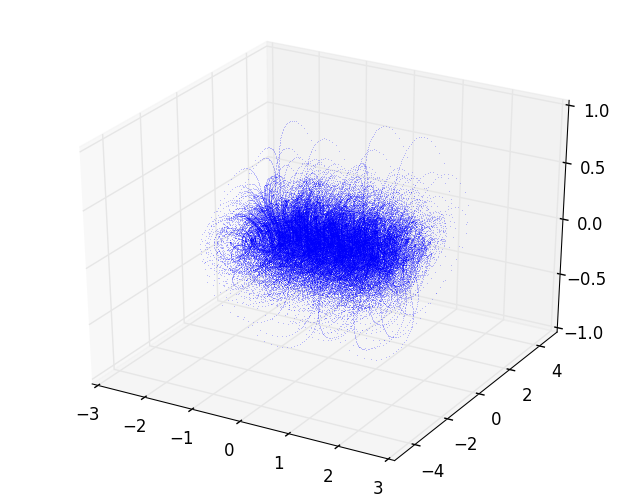

In [13]:
plot3D(trajec[:,2], trajec[:,3], trajec[:,4], ".", ms = 0.5, alpha = 0.3);

You may save the trajectory in an .hdf5 file with the command `save_trajectory`

In [14]:
filename = "trajecquart"
save_trajectory(filename, trajec, parameters)

The trajecquart.hdf5 was saved in the folder `../data/`


## Poincaré sections

In [15]:
zsection = section(trajec, parameters, "z")

3018×4 Array{Float64,2}:
    0.30471   0.78957    0.400067     4.06605e-13
    1.013     1.3954     0.105552     5.77443e-13
    1.80267   0.784591  -0.292537     2.20866e-13
    2.53895   0.151112  -0.345936     4.88955e-13
    3.28354  -0.491467  -0.332728     2.93907e-14
    4.01751  -1.1098    -0.174366     6.76108e-13
    5.04947  -0.464374   0.0904344    2.23534e-13
    6.02384   0.213772   0.105173     5.20088e-13
    6.9922    0.87312   -0.00717075   4.46179e-13
    7.93827   0.216788  -0.117004     5.86023e-13
    8.89099  -0.457818  -0.103299     4.65682e-13
    9.88612  -1.10076    0.146047     4.29892e-13
   10.635    -0.480382   0.308246     2.90279e-13
    ⋮                                            
 1240.4       0.240941   2.51071     -3.13187e-13
 1241.49      0.951023   2.90928     -3.83894e-13
 1242.33      0.947742  -1.65845     -3.55157e-13
 1243.04      0.297367  -1.6163      -8.72819e-13
 1243.73     -0.339918  -1.61571     -3.94786e-13
 1244.45     -0.992247  -

The generated array has the same structure than the array generated by the function `trajectory`

In [16]:
psection = section(trajec, parameters, "p")

391×4 Array{Float64,2}:
    4.1634   -1.1226    -5.26367e-13  -0.144417  
    9.76571  -1.10959   -6.97355e-13   0.119563  
   16.4226   -1.69568   -2.08347e-13   0.0775258 
   23.591    -1.21435   -6.01992e-13   0.11921   
   29.791    -1.24015   -9.85996e-13   0.0327353 
   35.9522   -1.24959   -7.90253e-13   0.00671085
   42.1139   -1.24898   -5.76773e-13  -0.00917453
   48.2756   -1.23766   -9.98331e-13  -0.0390192 
   54.5008   -1.21026   -1.07804e-13  -0.148267  
   59.6634   -0.696923  -5.17681e-13   0.160958  
   64.9582   -1.05623   -4.90074e-13   0.634655  
   72.134    -1.55135   -9.73416e-13  -0.177341  
   78.6173   -1.09758   -5.6918e-14    0.271641  
    ⋮                                            
 1177.15      1.6528     2.28238e-13  -0.116474  
 1184.27      1.62713    2.49953e-13   0.0632901 
 1190.95      1.0925     8.88561e-13  -0.059756  
 1196.88      1.28035    3.28207e-14   0.419259  
 1203.76      1.35762    6.30729e-13   0.241641  
 1211.32      1.93477    5

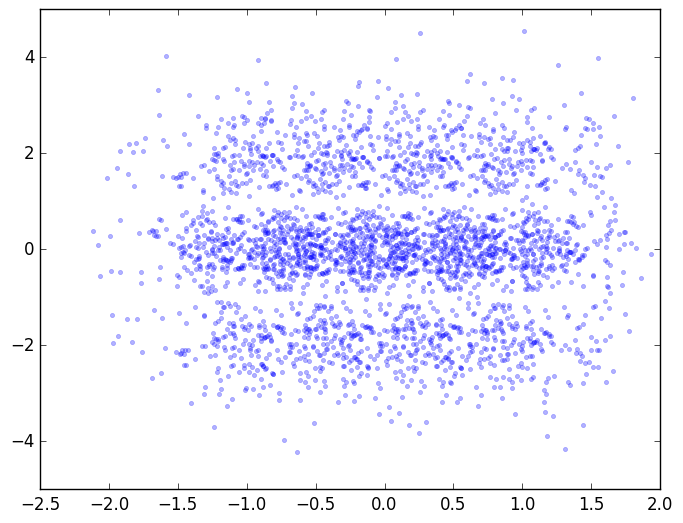

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0cd652d510>

In [17]:
plot(zsection[:,2], zsection[:,3], ".", alpha = 0.3)

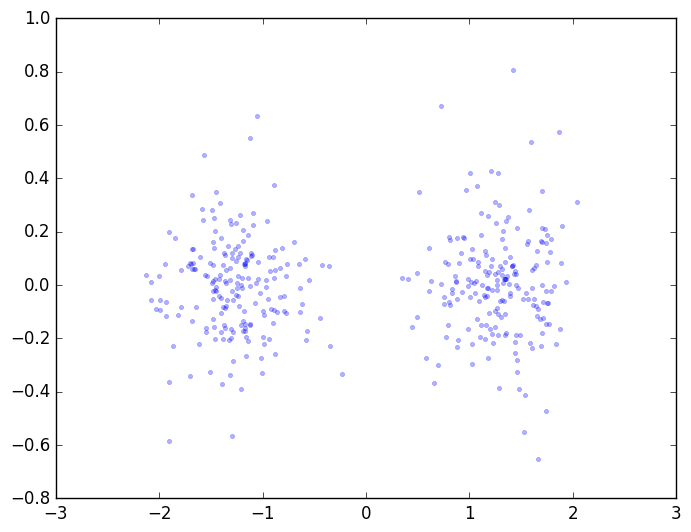

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0cd647e1d0>

In [18]:
plot(psection[:,2], psection[:,4], ".", alpha = 0.3)

## Marginal distributions

The normalization factor $Z$ corresponds to the configurational partition function, i.e.
    
$$ \rho(q) = \frac{e^{-\beta V(q)}}{Z} $$

$$ Z = \int_{-\infty}^{\infty} e^{-\beta V(q)} $$

For the quartic potential with $\beta = 1.0$, $Z = 2.563693352$

In [19]:
Z = 2.563693352
data_marg = marginaldistributions(trajec, parameters, Z)

100001×6 Array{Float64,2}:
 0.541005  0.381797   1.59516   0.111782  0.0611364  2.28021
 0.560533  0.380553   1.52716   0.124301  0.0791468  2.14601
 0.57914   0.379245   1.44876   0.139682  0.0943507  2.01685
 0.596727  0.377892   1.36449   0.15726   0.106604   1.90541
 0.613243  0.376512   1.27821   0.17625   0.115933   1.81768
 0.628683  0.375122   1.19262   0.195909  0.122514   1.75489
 0.64307   0.373737   1.10972   0.215524  0.12658    1.71587
 0.656442  0.372369   1.03098   0.234476  0.128399   1.69838
 0.668861  0.371025   0.956966  0.252377  0.128241   1.6999 
 0.680389  0.369714   0.888169  0.268915  0.126371   1.71788
 0.69109   0.368441   0.824873  0.283896  0.123041   1.74984
 0.701033  0.367207   0.766955  0.29729   0.118455   1.79369
 0.710285  0.366015   0.714273  0.309118  0.112799   1.84736
 ⋮                                                   ⋮      
 0.21965   0.389835  -0.90826   0.264106  0.084613   2.10098
 0.208572  0.389878  -0.864732  0.274496  0.0819338  2.123

The data is saved in the format
$$q \quad \rho(q) \quad p \quad \rho(p) \quad \zeta \quad \rho(\zeta)  $$

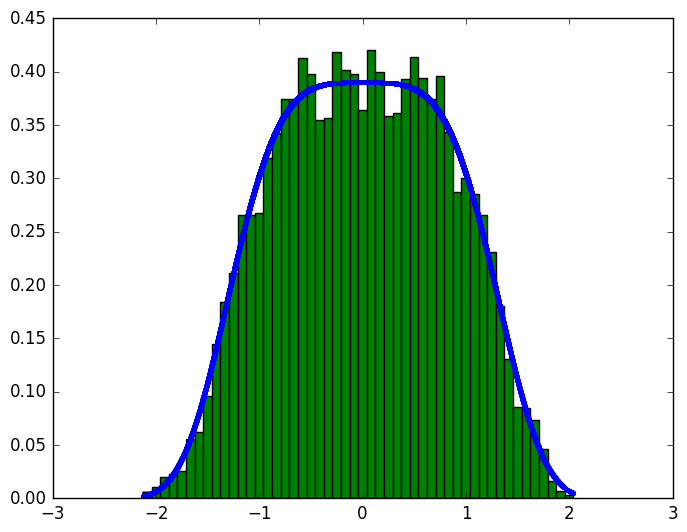

In [20]:
plot(data_marg[:,1], data_marg[:,2], ".", lw = 0.2)
plt[:hist](data_marg[:,1], 50, normed = true);

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Hellinger distance

In [21]:
?hellingerdistance

search: hellingerdistance



This function returns the hellinger distance calculated in n (10 by default) different intervals of a trajectory together with its error. The normalization factor associated with the distribution in `q` is passed as an argument. Example:

```
julia> hellingerdistance(filename, Potential("quartic", x->x^4./4.),
Thermostat("logistic", Q, x -> exp(x/Q)/(Q*(1.+ exp(x/Q)).^2)), normalizationfactor, n)
```


In [22]:
data_hell = hellingerdistance(trajec, parameters, Z)

1
2
3
4
5
6
7
8
9
10


10×3 Array{Float64,2}:
  123.75  0.0776613  0.000775798
  248.75  0.079786   0.000796632
  373.75  0.0630056  0.000629   
  498.75  0.0584512  0.000582449
  623.75  0.0559881  0.000557007
  748.75  0.0532363  0.000528193
  873.75  0.054953   0.000547241
  998.75  0.0502745  0.000502543
 1123.75  0.0480994  0.000479161
 1248.75  0.044693   0.000446313

The data is returned in the format $$time \quad hellinger \quad error $$

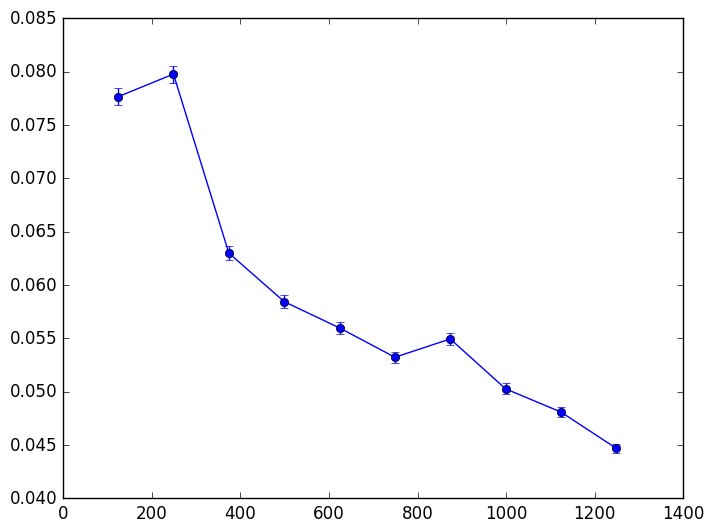

In [23]:
plt[:errorbar](data_hell[:,1], data_hell[:,2], yerr = data_hell[:,3], fmt = "o-");

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Other thermostats

Consider, for instance, the Nosé-Hoover thermostat. In the density dynamics formalism it is given by

In [24]:
thermo = Thermostat("Nose-Hoover", x-> 1.0 / sqrt(T*2*pi*Q) *exp(-x^2./(T*2*Q))) 

ThermostattedDynamics.Thermostat{##5#6}("Nose-Hoover",#5)

In [25]:
parameters.thermo = thermo
parameters.potential = Potential("Harmonic", x->x^2./2.0)

ThermostattedDynamics.Potential{##7#8}("Harmonic",#7)

In [29]:
trajNH = trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Part 4 done.
Part 5 done.
Part 6 done.
Part 7 done.
Part 8 done.
Part 9 done.
Part 10 done.


100001×4 Array{Float64,2}:
    0.0     -0.295468  0.00296057   0.0178663 
    0.0125  -0.295408  0.00664709   0.00536665
    0.025   -0.295301  0.0103405   -0.00713244
    0.0375  -0.295149  0.0140511   -0.0196306 
    0.05    -0.294952  0.0177868   -0.0321278 
    0.0625  -0.294708  0.0215602   -0.0446234 
    0.075   -0.294416  0.0253847   -0.057117  
    0.0875  -0.294076  0.0292736   -0.0696081 
    0.1     -0.293686  0.0332403   -0.0820961 
    0.1125  -0.293245  0.037298    -0.0945806 
    0.125   -0.292752  0.0414601   -0.107061  
    0.1375  -0.292205  0.04574     -0.119537  
    0.15    -0.291603  0.050151    -0.132007  
    ⋮                                         
 1249.86     1.33467   0.472014    -0.138651  
 1249.88     1.34052   0.463688    -0.148417  
 1249.89     1.34627   0.455705    -0.158276  
 1249.9      1.35191   0.448058    -0.168223  
 1249.91     1.35747   0.440742    -0.178253  
 1249.92     1.36294   0.433754    -0.188363  
 1249.94     1.36832   0.427089  

In [30]:
zsNH = section(trajNH, parameters, "z")

1461×4 Array{Float64,2}:
    0.0178669  -0.295368   0.00823139   9.92773e-14
    1.76632     0.804344  -0.166098     9.98416e-13
    3.21456    -0.411007  -0.239854     4.41797e-13
    5.10556    -1.48648    0.497788     7.17314e-13
    6.43569    -0.222716   0.601051     1.17075e-13
    7.69521     0.993928   0.587888     2.77082e-13
    9.40573     2.28283   -0.37996      6.59742e-13
   10.9019      0.881704  -0.765665     1.62615e-13
   12.0629     -0.264334  -0.720298     3.93846e-13
   13.3077     -1.48228   -0.772473     3.67943e-13
   15.7315     -0.61106    0.275288     5.58438e-13
   17.1343      0.61392    0.27483      7.72493e-13
   19.6087      1.47142   -0.776287     4.07751e-13
    ⋮                                              
 1230.41        0.942193  -1.28771     -9.87798e-13
 1232.07       -0.666081  -1.26833     -6.41211e-13
 1233.6        -2.03544   -2.04043     -7.63323e-13
 1234.61       -2.06605    1.61383     -4.84509e-13
 1236.09       -0.670602   1.16641     

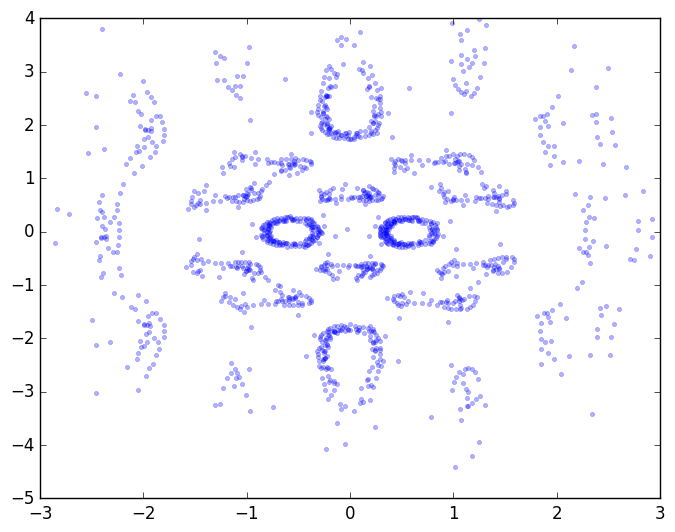

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0cd6255710>

In [31]:
plot(zsNH[:,2],zsNH[:,3], ".", alpha = 0.3)